In [2]:
# 新增
import pygmt  #注意：将pygmt写在最前面，避免出现不必要的问题
import linecache

import pandas as pd
import numpy as np
from matplotlib.ticker import MultipleLocator
import matplotlib as mpl
mpl.rcParams["font.family"] = 'Arial'  #默认字体类型
mpl.rcParams["mathtext.fontset"] = 'cm' #数学文字字体
mpl.rcParams["contour.negative_linestyle"] = 'dashed'  #默认字体类型
import matplotlib.pyplot as plt
import os
from netCDF4 import Dataset

In [16]:
projections_name=['Hammer','Mollweide','Winkel Tripel','Robinson','Eckert IV','Eckert VI',
                  'Sinusoidal','Van der Grinten','Hemisphere','Orthographic','Gnomonic','Cylindrical equidistant']
projections=['H','W','R','N','Kf','Ks','I','V','A280/30/','G-75/41/','F-120/35/60/','Q']
for proj in projections:
    fig=pygmt.Figure()
    pygmt.config(FONT_TITLE='11p,Helvetica,black',MAP_TITLE_OFFSET='-10p')
    fig.basemap(region='g',projection=proj+'12c',B='+t"Title"')
    fig.coast(land='gray',water='lightblue',frame='a30f10g5')
    fig.savefig('../../figures/Chapter3/Lecture3_1_test1.pdf',show=True)
    fig.show()

In [25]:

projections_name=['Albers conic equal-area','Equidistant conic','Lambert conic conformal','Mercator']
projections=['B','D','L','M']
regions = [[70,138,13,56],[-88, -70,18,24],[-130, -70, 24, 52],[70,138,13,56]]
for proj, region in zip(projections,regions):
    fig=pygmt.Figure()
    pygmt.config(FONT_TITLE='11p,Helvetica,black',MAP_TITLE_OFFSET='-10p')
    if(proj=='M'):
        projection=proj+'12c'
    else:
        projection=proj+str('%f/%f/%f/%f/12c'%((region[0]+region[1])/2, (region[2]+region[3])/2, region[2],region[3]))
    fig.basemap(region=region,projection=projection,B='+t"Title"')
    fig.coast(land='gray',water='lightblue',frame='a30fg')
    fig.savefig('../../figures/Chapter3/Lecture3_1_test1_'+proj+'.pdf',show=True)
    fig.show()

## 案例精讲

In [2]:
region=[70,138,13,56]
captials=np.loadtxt('Data/China/CN-capitals_EN.dat',skiprows=1, usecols=(0,1))


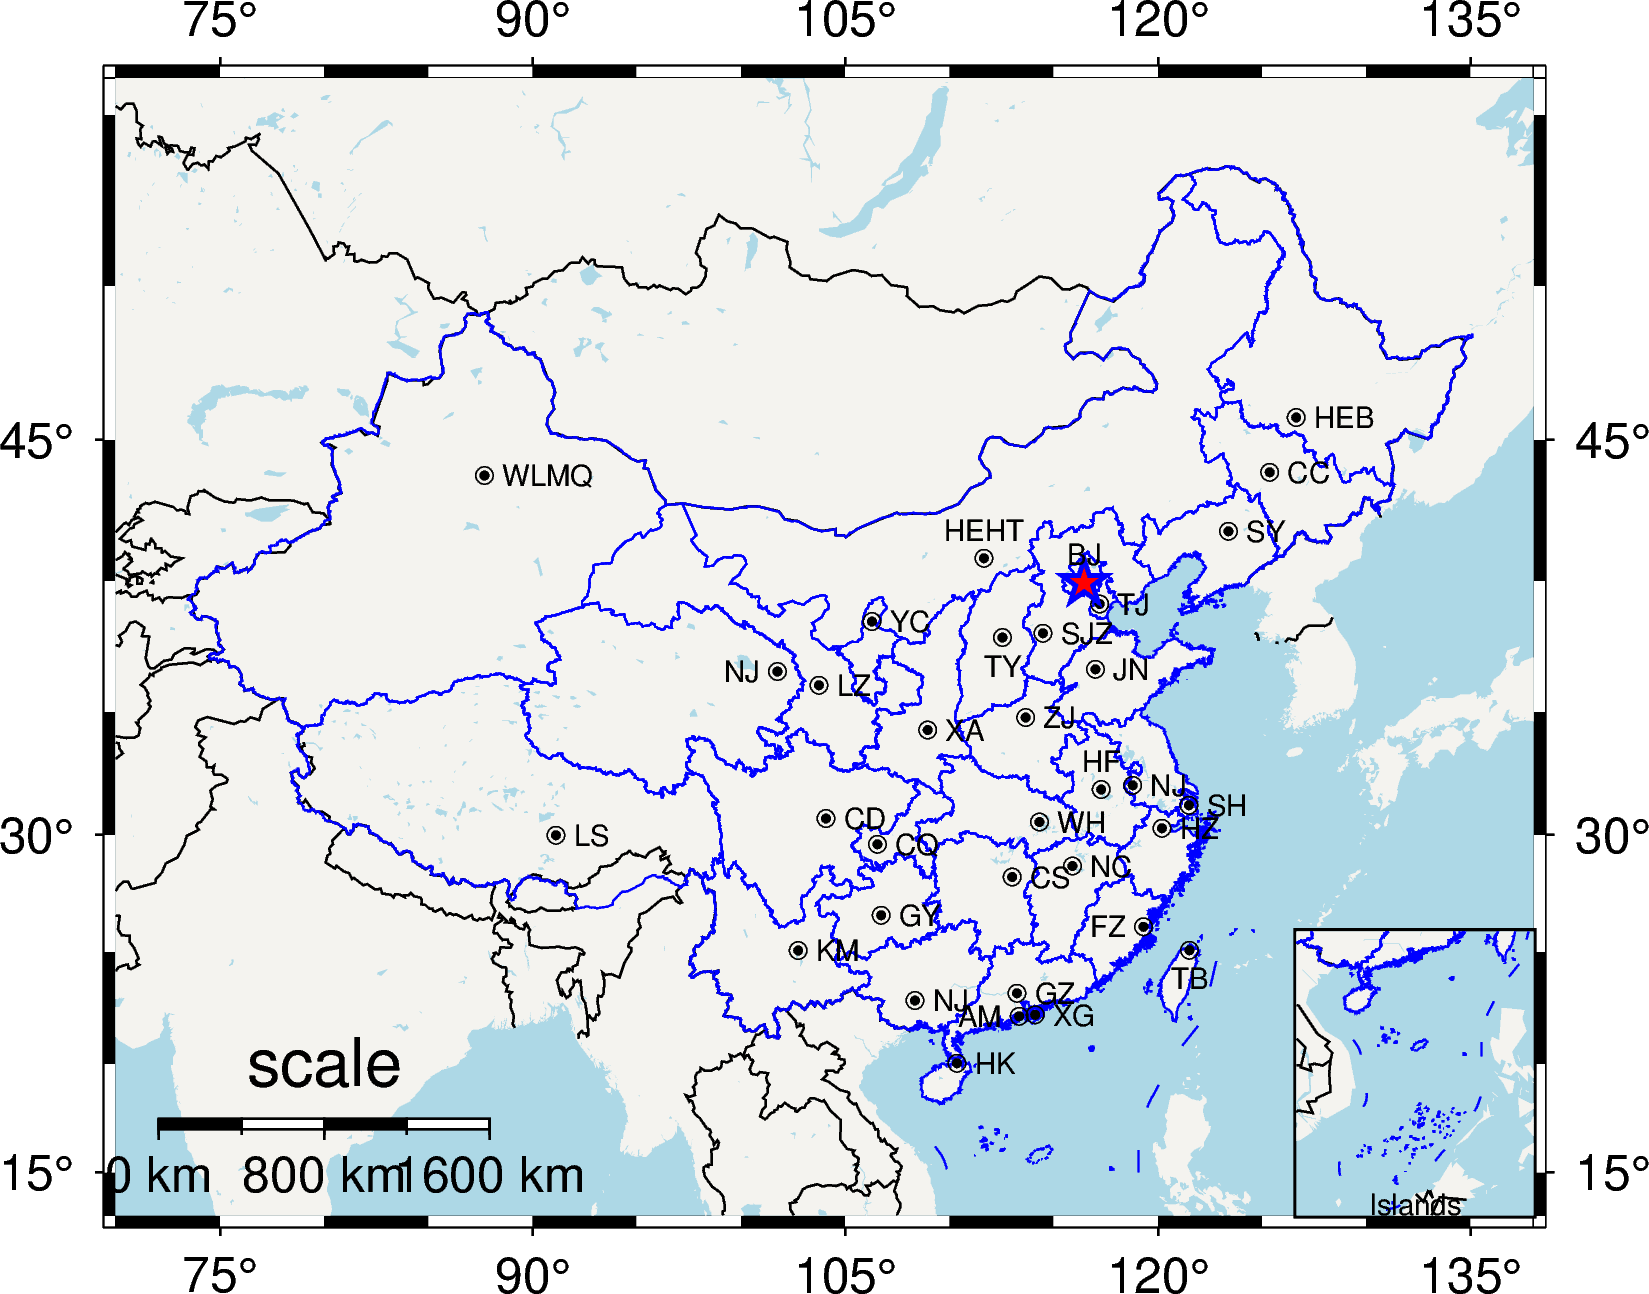

In [3]:
fig=pygmt.Figure()

pygmt.config(MAP_FRAME_WIDTH='3p')
figwidth=12
fig.basemap(region=region, projection=str('M%.0fc'%(figwidth)), frame=True)
fig.coast(borders=['1/0.5p,black'],land='244/243/239',water='lightblue',L='g80/17+c25+w1600k+f+u+lscale')
# 边界
fig.plot(data='Data/China/CN-border-La.dat',pen='0.4p,blue')
# 省会坐标
fig.plot(x=captials[:,0],y=captials[:,1],style='c0.08c',color='black')
fig.plot(x=captials[:,0],y=captials[:,1],style='c0.15c')
fig.plot(x=116.46, y=39.92, style='a0.4c', color='red', pen='1p,blue')
# 城市
figwidth2=2
fig.text(textfiles='Data/China/CN-capitals_EN.dat', F='+f7p,Helvetica+j', D='j0.15c/0.15c')

# 图中图
fig.basemap(region=[105, 123, 3, 24], projection=str('M%.0fc'%(figwidth2)), frame='0', X=str('%.0fc'%(figwidth-figwidth2)))
fig.coast(borders=['1/0.5p,black'],land='244/243/239',water='lightblue')
fig.plot(data='Data/China/CN-border-La.dat',pen='0.4p,blue')
fig.text(position='BC',text='Islands',F='+f7p,Helvetica')

fig.show()

# 地形

In [22]:
# 1. 获取城市的名称及经纬度坐标
provinces_name_pos_data={}
alldata=linecache.getlines('Data/China/CN-capitals.dat')
for i in range(1,len(alldata)):
    data=alldata[i].split()
    provinces_name_pos_data[data[4]]={'lon':data[0],'lat':data[1],'confirm':0} #  np.array([data[0],data[1]])
provinces=provinces_name_pos_data.keys()
# print(len(provinces),provinces)
linecache.clearcache()
# 2. 获取省份的新冠数据
COVID_path='Data/COVID-19/Data/China_Chinese'
files_covid=os.listdir(COVID_path)
date='2020-02-01'
data=pd.read_csv(COVID_path+'/'+date+'.csv')
keys_data=data.columns
print(keys_data)
names=data[keys_data[1]].values
lon=np.zeros_like(names,dtype=float)
lat=np.zeros_like(names,dtype=float)
confirm=np.log10(data[keys_data[2]].values)
for i in range(0,len(names)):
    names[i]=names[i].replace(' ','')
    #print(names[i],captials_name_pos[names[i]])
    lon[i]=float(provinces_name_pos_data[names[i]]['lon'])
    lat[i]=float(provinces_name_pos_data[names[i]]['lat'])
    provinces_name_pos_data[names[i]]['confirm']=confirm[i]
data['lon']=lon
data['lat']=lat

Index(['序号', ' 名称', ' 确诊', ' 死亡', ' 治愈', ' '], dtype='object')


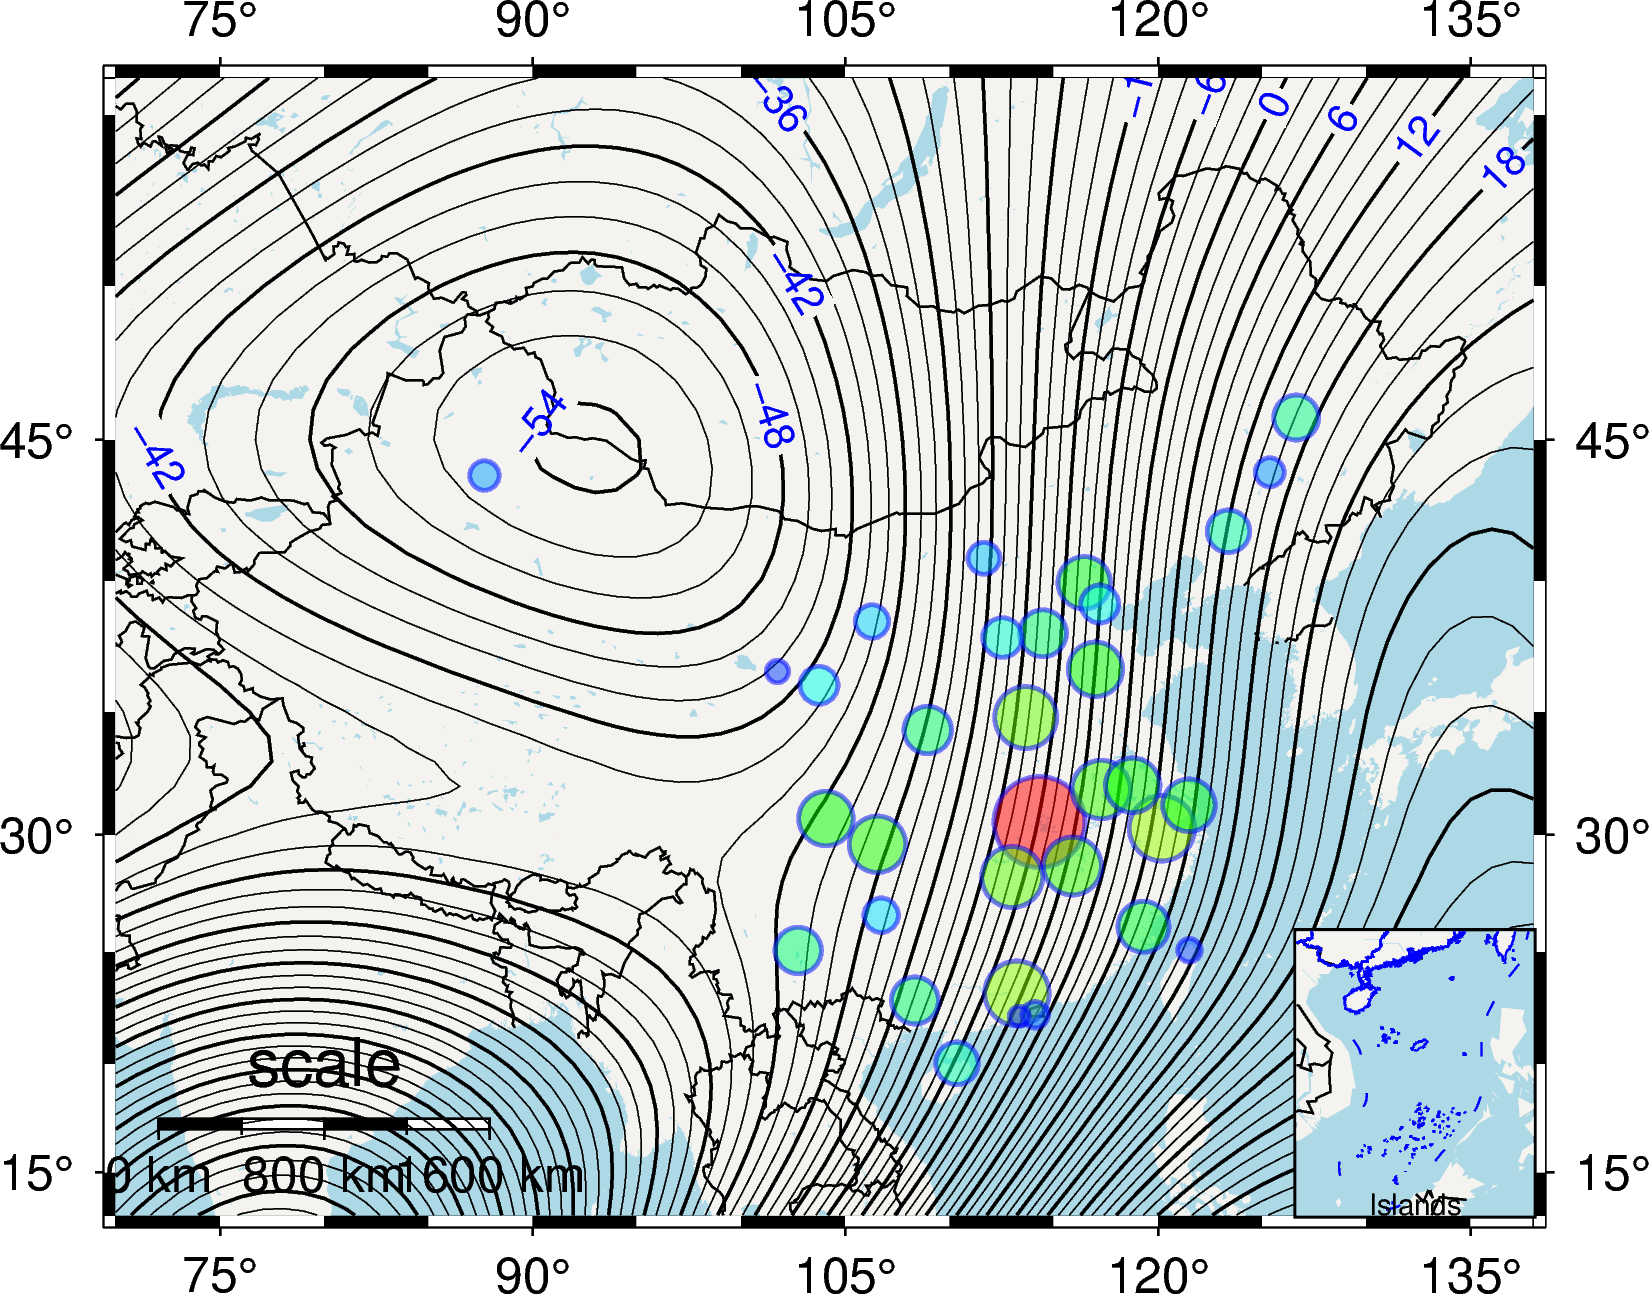

In [30]:
fig=pygmt.Figure()

pygmt.config(MAP_FRAME_WIDTH='3p')
figwidth=12
fig.basemap(region=region, projection=str('M%.0fc'%(figwidth)), frame=True)
fig.coast(borders=['1/0.5p,black'],land='244/243/239',water='lightblue',L='g80/17+c25+w1600k+f+u+lscale')


# # 边界
# fig.plot(data='Data/China/CN-border-La.dat',pen='0.4p,blue')
# # 省会坐标
# fig.plot(x=captials[:,0],y=captials[:,1],style='c0.08c',color='black')
# fig.plot(x=captials[:,0],y=captials[:,1],style='c0.15c')
# fig.plot(x=116.46, y=39.92, style='a0.4c', color='red', pen='1p,blue')
# 城市
figwidth2=2
# fig.text(textfiles='Data/China/CN-capitals_EN.dat', F='+f7p,Helvetica+j', D='j0.15c/0.15c')

# 地形
# pygmt.grdcut(grid='Data/Global/ETOPO10.nc', outgrid='Data/China/ETOPO.nc',region=region)
# fig.grdimage('Data/China/ETOPO.nc', C='Data/China/ETOPO.cpt', I='Data/China/ETOPO_grad.nc', t='50')
fig.grdcontour('Data/China/geoid.nc',C='2',A='6+f10p,blue')
pygmt.makecpt(cmap='rainbow', series=[np.min(confirm), np.max(confirm)+1e-5], output='covid.cpt')
fig.plot(x=data.lon,y=data.lat,sizes=confirm/5,style='cc',color=confirm, cmap='covid.cpt',t='50',pen='1p,blue')
# fig.colorbar(D='jLT+w6c/0.2c+o0.2c/1c+h',cmap='Data/China/ETOPO.cpt',frame='af+l"Topography (m)"',F='+gwhite@50')
# 图中图
fig.basemap(region=[105, 123, 3, 24], projection=str('M%.0fc'%(figwidth2)), frame='0', X=str('%.0fc'%(figwidth-figwidth2)))
fig.coast(borders=['1/0.5p,black'],land='244/243/239',water='lightblue')
fig.plot(data='Data/China/CN-border-La.dat',pen='0.4p,blue')
fig.text(position='BC',text='Islands',F='+f7p,Helvetica')

fig.show()

In [39]:
# 获取省份的经纬度和全球行政区数据中的代码
provinces_name_code={}
provinces_names=[]
provinces_code=[]
alldata=linecache.getlines('Data/China/CN-capitals.dat')
for i in range(1,len(alldata)):
    data=alldata[i].split()
    provinces_name_code[data[4]]={'code':data[5]}
    provinces_names.append(data[4])
    provinces_code.append(data[5])
provinces_code=np.array(provinces_code,dtype=int)
print(len(provinces_names),len(provinces_code))


34 34


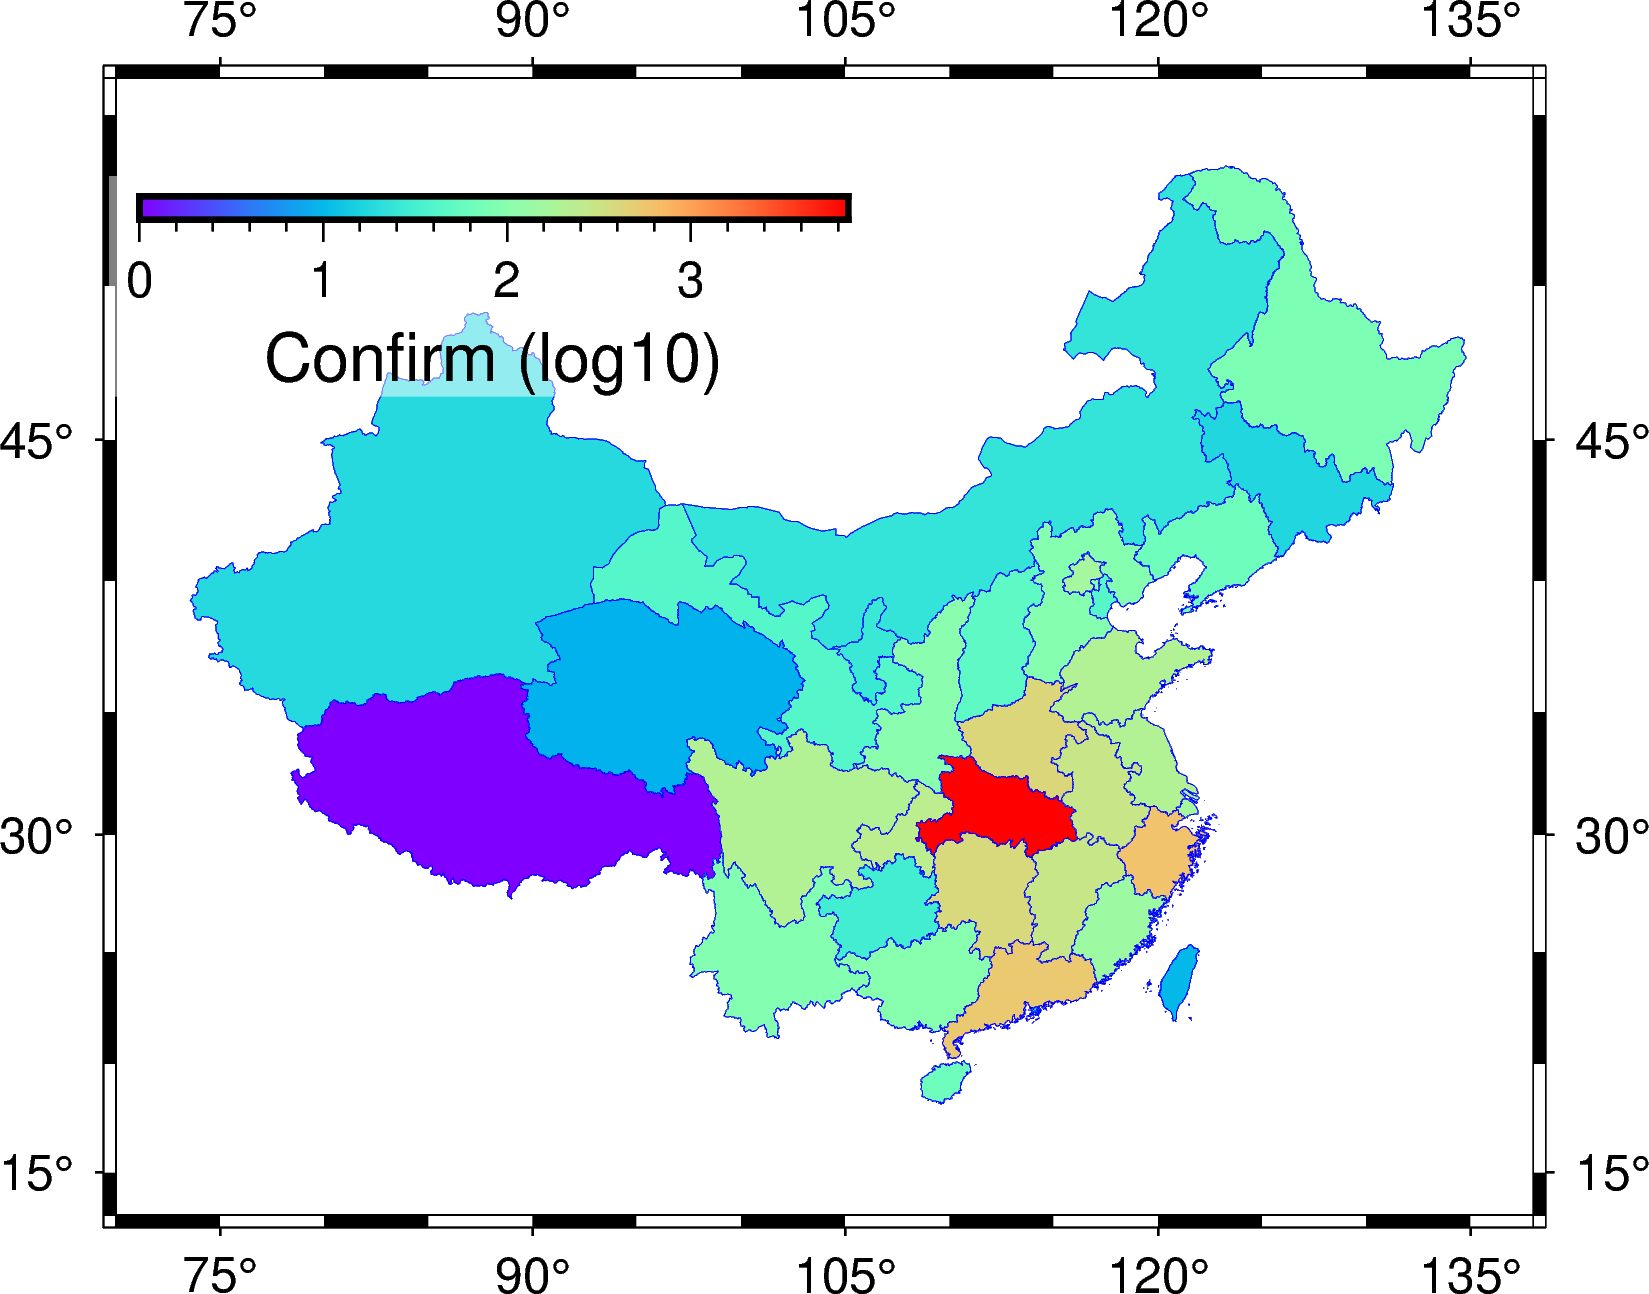

In [43]:
fig=pygmt.Figure()

norm=mpl.colors.Normalize(vmin=np.min(confirm),vmax=np.max(confirm))
# write cpt file
color_nodes=np.linspace(norm.vmin,norm.vmax,20)
fpout=open('covid_cn.cpt','w')
for i in range(0,len(color_nodes)-1):
    value1=color_nodes[i]
    value2=color_nodes[i+1]
    rgb1=mpl.cm.rainbow(norm(value1),bytes=True) 
    rgb2=mpl.cm.rainbow(norm(value2),bytes=True) 
    fpout.write('%f %.0f/%.0f/%.0f %f %.0f/%.0f/%.0f\n'%(value1, rgb1[0],rgb1[1],rgb1[2],value2, rgb2[0],rgb2[1],rgb2[2]))
fpout.close()

pygmt.config(MAP_FRAME_WIDTH='3p')
figwidth=12
fig.basemap(region=region, projection=str('M%.0fc'%(figwidth)), frame=True)
for i in range(0,len(provinces_code)):
    code=provinces_code[i]
    province_name=provinces_names[i]
    confirm_province=provinces_name_pos_data[province_name]['confirm']
    rgb_color=mpl.cm.rainbow(norm(confirm_province),bytes=True)
    fig.coast(E=str('CN.%s+p0.05p,blue+g%.0f/%.0f/%.0f'%(code,rgb_color[0],rgb_color[1],rgb_color[2])))

fig.colorbar(D='jLT+w6c/0.2c+o0.2c/1c+h',cmap='covid_cn.cpt',frame='af+l"Confirm (log10)"',F='+gwhite@50')

fig.show()

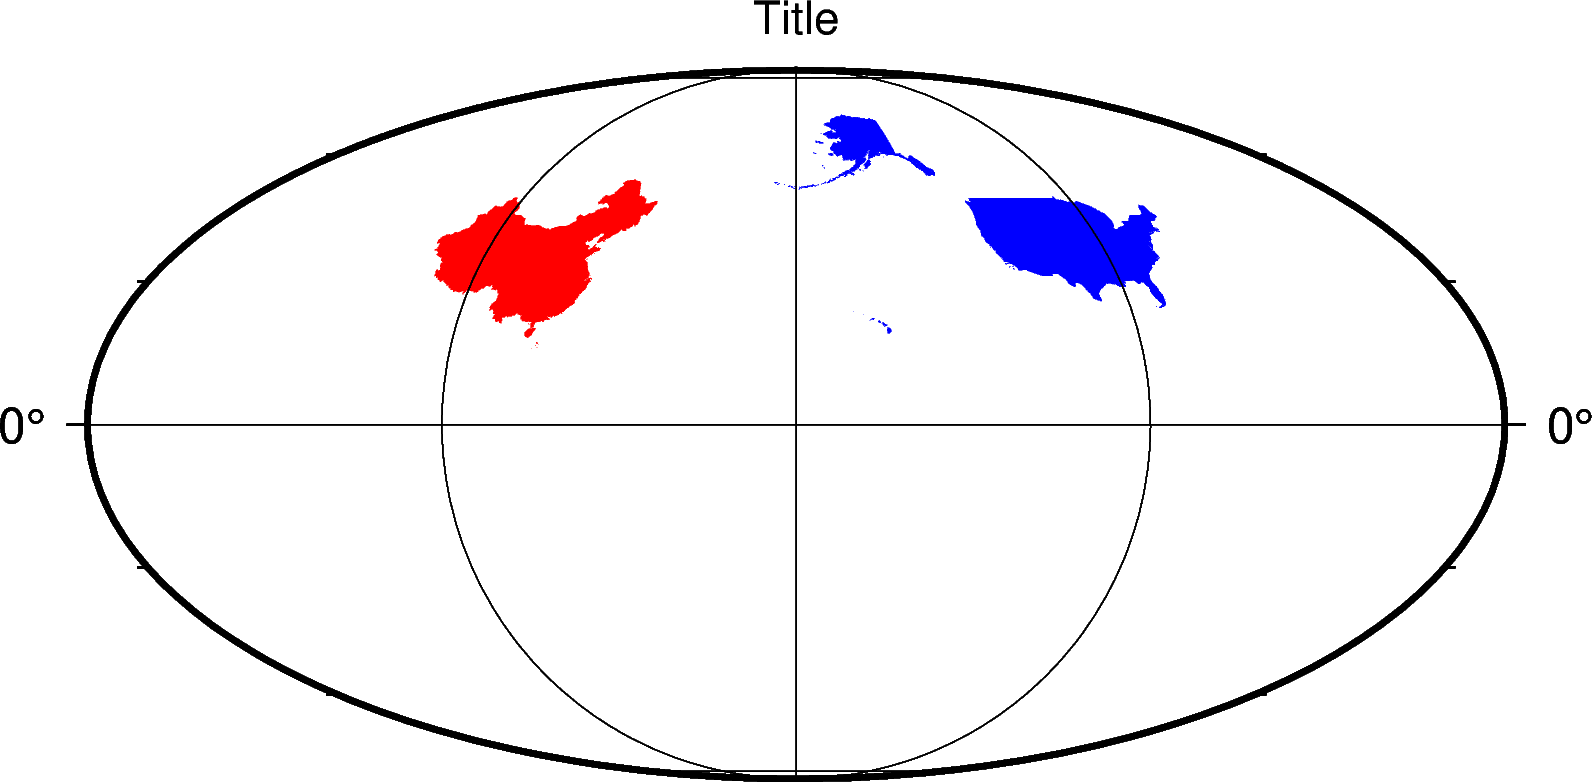

In [47]:
fig=pygmt.Figure()
pygmt.config(FONT_TITLE='11p,Helvetica,black',MAP_TITLE_OFFSET='-10p')
fig.basemap(region='g',projection='W12c',B='+t"Title"')
fig.coast(E='CN+gred',frame='afg')
fig.coast(E='US+gblue',frame='afg')
fig.savefig('../../figures/Chapter3/Lecture3_1_test1.pdf',show=True)
fig.show()